In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CARGA DE ARCHIVOS


In [33]:
# Historico Velocidad Internet

df1= pd.read_csv("./Datos/historico_velocidad_internet.csv")
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     35 non-null     int64 
 1   Trimestre               35 non-null     int64 
 2   Mbps (Media de bajada)  35 non-null     object
 3   Trimestre.1             35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [34]:
df1.sort_values(['Año'], ascending=True, inplace=True)#datos ordenados por año. (Inicio de carga:2014, fin:2022)

In [36]:
# Limpio y convierto los valores de la columna 'Mbps' a tipo numérico
df1['Mbps (Media de bajada)'] = df1['Mbps (Media de bajada)'].str.replace(',', '.')
df1['Mbps (Media de bajada)'] = pd.to_numeric(df1['Mbps (Media de bajada)'])


In [22]:
suma_mbps_por_año = df1.groupby('Año')['Mbps (Media de bajada)'	].sum()
suma_mbps_por_año 

Año
2014     15.41
2015     18.68
2016     22.78
2017     34.13
2018     58.38
2019     90.15
2020    158.87
2021    189.54
2022    176.01
Name: Mbps (Media de bajada), dtype: float64

In [62]:
df2= pd.read_csv("./Datos/historico_velocidad_internet (1).csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [73]:
df2.shape#tamaño

(840, 4)

In [74]:
df2.describe()#estadisticas descriptivas

,Año,Trimestre,Mbps (Media de bajada)
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,13.841667
std,2.528745,1.105009,14.669499
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.000000,4.000000
50%,2018.000000,2.000000,7.000000
75%,2020.000000,3.000000,18.000000
max,2022.000000,4.000000,101.000000


In [75]:
df2.isnull().sum()#no hay valores faltantes

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [65]:
#Historico Velocidad Internet por provincia
#df2.drop(columns=['Unnamed: 4','Unnamed: 5'], inplace=True)  elimino innecesarias
df2.head(30)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16
5,2022,3,Córdoba,56
6,2022,3,Corrientes,45
7,2022,3,Entre Ríos,42
8,2022,3,Formosa,30
9,2022,3,Jujuy,32


¡Interesante para el dashboard en power. hacer mapa monocromatico!

<function matplotlib.pyplot.show(close=None, block=None)>

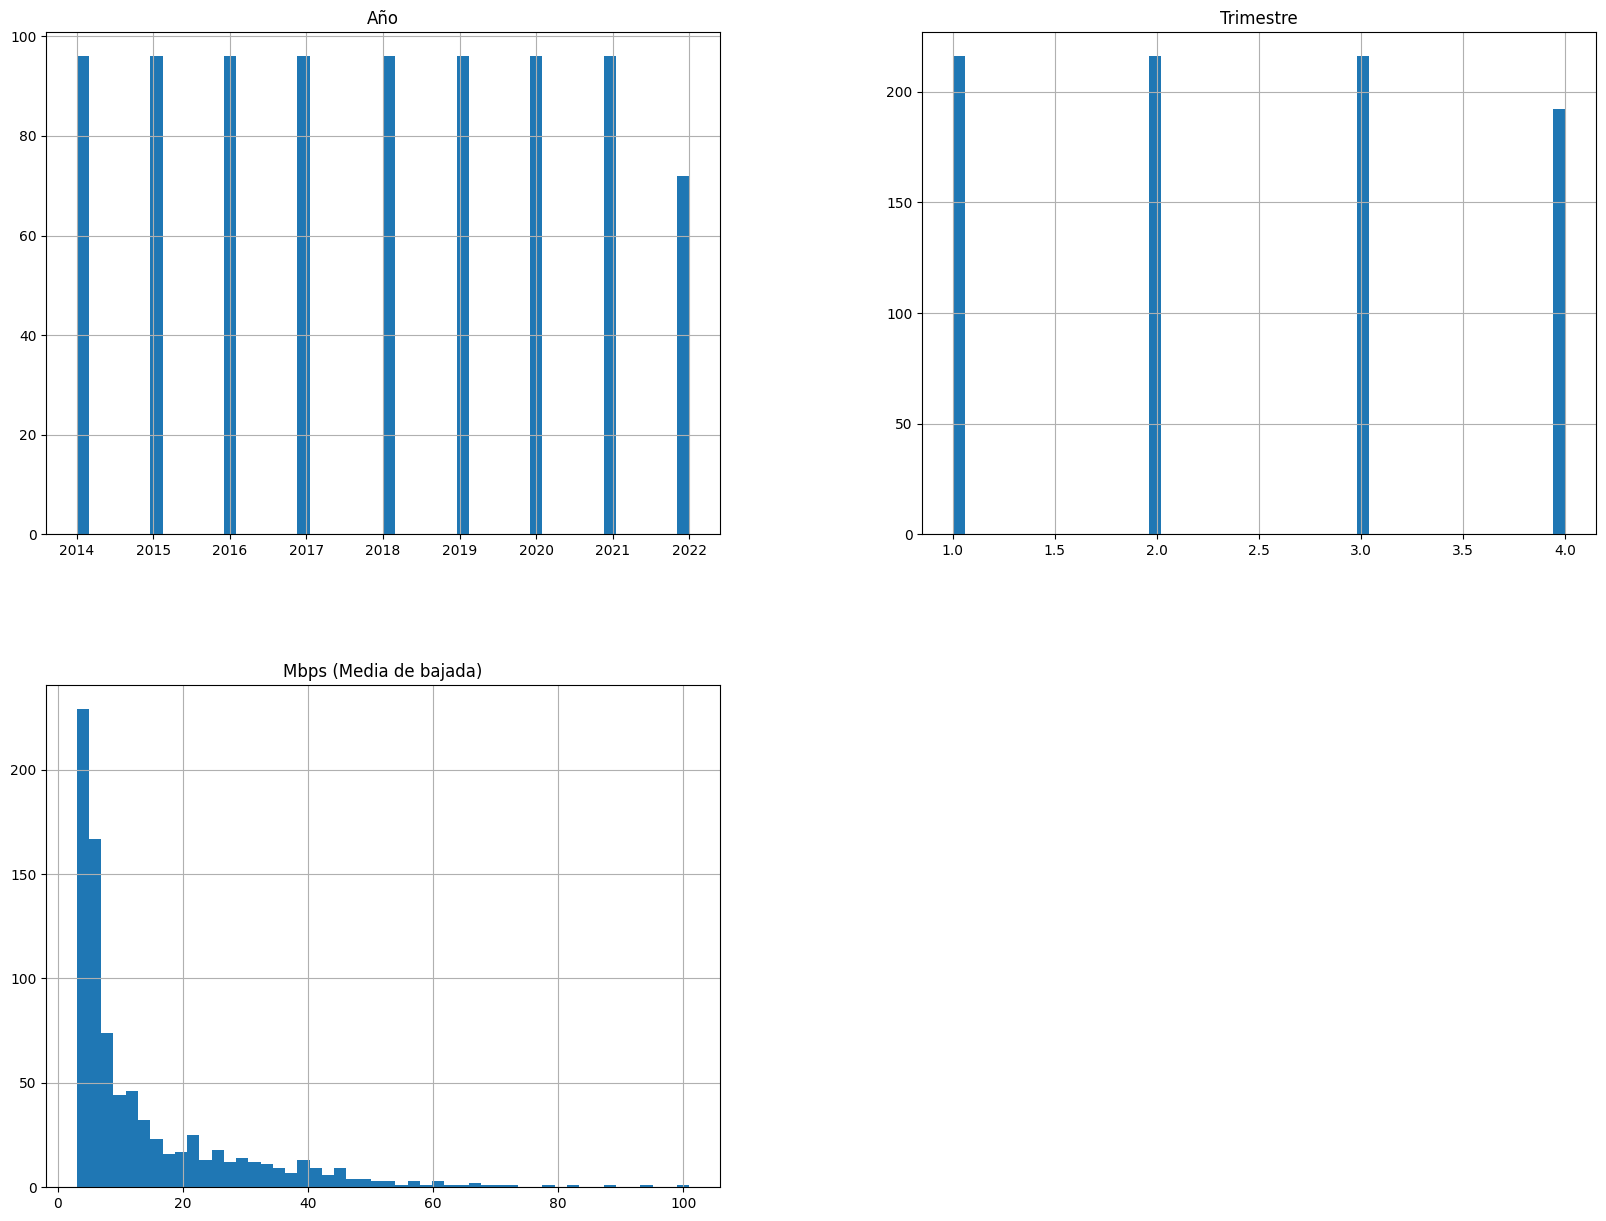

In [66]:
#hacemos un histograma para los datos numericos
df2.hist(bins = 50, figsize = (20,15)) 
plt.show

distribucion uniforme en año y trimestre

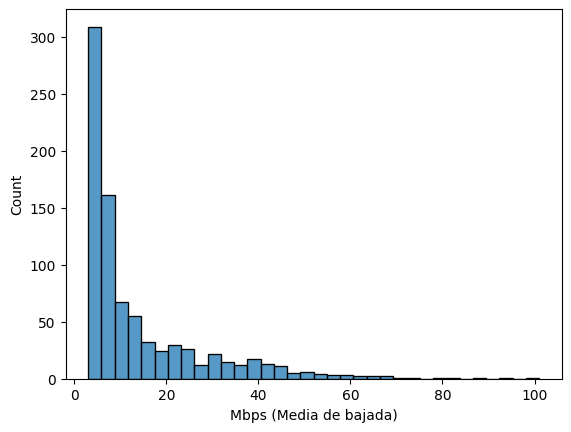

In [76]:
sns.histplot(df2['Mbps (Media de bajada)'])
plt.show()

In [103]:
#df2.head(2)
año= df2.groupby('Año')['Mbps (Media de bajada)'].sum()
prov_mbps= df2.groupby('Provincia')['Mbps (Media de bajada)'].sum()

In [104]:
dfapoyo= pd.DataFrame(prov_mbps.sort_values(ascending=False))

In [105]:
dfapoyo

,Mbps (Media de bajada)
Provincia,
Capital Federal,1165
Buenos Aires,861
Córdoba,686
Tucumán,671
Chaco,636
Neuquén,631
Catamarca,630
Misiones,565
Santa Fe,552


El siguiente grafico va a incluir: año, mbps, provincia.
La prov con mayor crecimiento fue Capital Federal. Le siguio Buenos Aires,Cordoba y Tucuman.

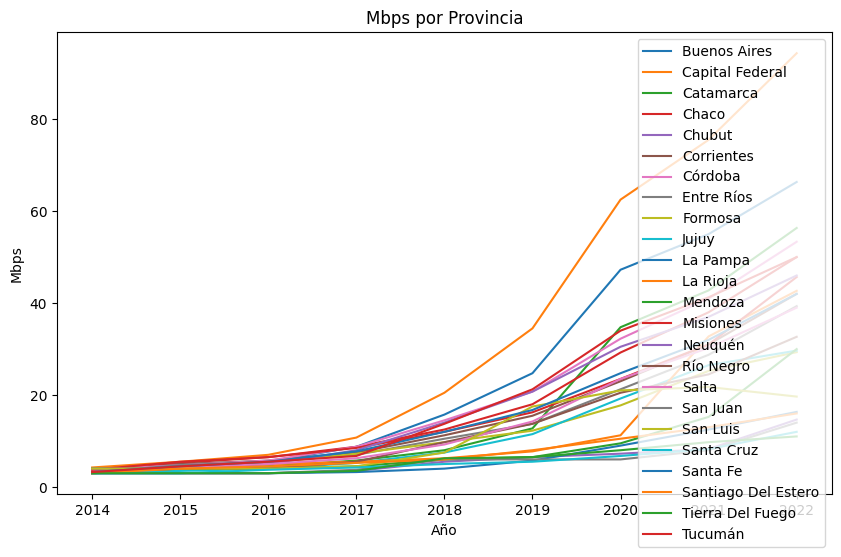

In [92]:

# Agrupo los datos por provincia y año para calcular el promedio de Mbps
df_agrupado = df2.groupby(['Provincia', 'Año'])['Mbps (Media de bajada)'].mean().reset_index()

# Creo la figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Recorro cada provincia y trazo la línea correspondiente
for provincia in df_agrupado['Provincia'].unique():
    data = df_agrupado[df_agrupado['Provincia'] == provincia]
    ax.plot(data['Año'], data['Mbps (Media de bajada)'], label=provincia)

# Configuro los ejes y la leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Mbps')
ax.set_title('Mbps por Provincia')
ax.legend()

plt.show()


In [151]:
# CONECTIVIDAD A INTERNET
df3= pd.read_csv("./Datos/ConectividadalserviciodeInternet_2776151688497282142.csv")
df3.info()
#tenemos 16 columnas de las cuales 8 no tienen nombre 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2871 non-null   object 
 1   Partido        2866 non-null   object 
 2   Localidad      2884 non-null   object 
 3   Unnamed: 3     2879 non-null   float64
 4   Unnamed: 4     2873 non-null   object 
 5   CABLEMODEM     2862 non-null   object 
 6   DIALUP         2882 non-null   object 
 7   Unnamed: 7     2878 non-null   object 
 8   Unnamed: 8     2872 non-null   object 
 9   WIRELESS       2864 non-null   object 
 10  TELEFONIAFIJA  2873 non-null   object 
 11  Unnamed: 11    2871 non-null   object 
 12  Unnamed: 12    2879 non-null   object 
 13  link           2865 non-null   float64
 14  Latitud        2872 non-null   object 
 15  Unnamed: 15    2879 non-null   object 
dtypes: float64(2), object(14)
memory usage: 539.1+ KB


In [152]:
df3.shape #tamaño

(4312, 16)

In [153]:
df3.describe()

,Unnamed: 3,link
count,2879.000000,2.865000e+03
mean,7968.155262,3.924052e+07
std,28317.992664,2.947346e+07
min,0.000000,2.000010e+06
25%,118.000000,1.009101e+07
50%,573.000000,3.401407e+07
75%,3203.000000,6.613306e+07
max,560913.000000,9.401401e+07


In [155]:
df3.head(3)
#Dial-Up: son conexiones que se realizan a través de una llamada telefónica local utilizando un aparato denominado módem o modulador/demodulador. En este tipo de conexión el usuario abona los pulsos telefónicos consumidos y el servicio de acceso a Internet. 
# - wireless=Wireless al tipo de comunicación en la que no se utiliza un medio de propagación físico, sino que se utiliza modulación de ondas electromagnéticas, radiaciones o medios ópticos.
#cable módem es un tipo especial de módem diseñado para modular la señal de datos sobre una infraestructura de televisión por cable
#TELEFONIAFIJA= La telefonía fija o convencional es una infraestructura de telecomunicaciones diseñada para transferir señales acústicas a gran distancia por medio de señales eléctricas,

,Unnamed: 0,Partido,Localidad,Unnamed: 3,Unnamed: 4,CABLEMODEM,DIALUP,Unnamed: 7,Unnamed: 8,WIRELESS,TELEFONIAFIJA,Unnamed: 11,Unnamed: 12,link,Latitud,Unnamed: 15
0,NaN,Bahía Blanca,Villa Bordeau,0.0,NaN,--,--,--,NaN,--,--,NaN,SI,6056020.0,"-38,6472605094596",NaN
1,BUENOS AIRES,NaN,NaN,0.0,--,NaN,NaN,--,--,NaN,NaN,--,--,NaN,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,NaN,Balcarce,38376.0,SI,NaN,SI,SI,--,NaN,NaN,SI,SI,6063010.0,NaN,"-58,2551665841248"


Los datos estan muy incompletos. Por lo que comenzare con una limpieza y luego el analisis.

In [156]:
#renombrar columnas
df3 = df3.rename(columns={'Unnamed: 0': 'Provincia', 'Unnamed: 15': 'Latitud'})

In [157]:
#eliminare las columnas que no puedo dudicir a que hacen referencia
df3.drop(columns=['Unnamed: 3','Unnamed: 4','Unnamed: 7','Unnamed: 8', 'Unnamed: 11', 'Unnamed: 12'], inplace=True)

In [158]:
df3.isnull().sum()#vemos cantidad de faltantes por columna

Provincia        1441
Partido          1446
Localidad        1428
CABLEMODEM       1450
DIALUP           1430
WIRELESS         1448
TELEFONIAFIJA    1439
link             1447
Latitud          1440
Latitud          1433
dtype: int64

In [143]:
# Reemplazamos los valores nulos por un valor vacío
#df3= df3.fillna('')

In [159]:
df3

,Provincia,Partido,Localidad,CABLEMODEM,DIALUP,WIRELESS,TELEFONIAFIJA,link,Latitud,Latitud
0,NaN,Bahía Blanca,Villa Bordeau,--,--,--,--,6056020.0,"-38,6472605094596",NaN
1,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,NaN,Balcarce,NaN,SI,NaN,NaN,6063010.0,NaN,"-58,2551665841248"
3,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,SI,6063020.0,"-37,9412057603",NaN
4,BUENOS AIRES,Balcarce,NaN,--,NaN,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"
...,...,...,...,...,...,...,...,...,...,...
4307,CHACO,NaN,Quitilipi,NaN,--,NaN,SI,22133010.0,"-26,8732071732978","-60,2185241226399"
4308,CHACO,Quitilipi,NaN,--,NaN,SI,--,22133020.0,"-26,4551186226266",NaN
4309,CHACO,San Fernando,Barranqueras,SI,--,SI,SI,NaN,"-27,4877739289761","-58,9327416886365"
4310,NaN,San Fernando,Basail,SI,--,SI,NaN,NaN,NaN,"-59,2791003619491"


In [160]:
df3.info()#csv modificado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      2871 non-null   object 
 1   Partido        2866 non-null   object 
 2   Localidad      2884 non-null   object 
 3   CABLEMODEM     2862 non-null   object 
 4   DIALUP         2882 non-null   object 
 5   WIRELESS       2864 non-null   object 
 6   TELEFONIAFIJA  2873 non-null   object 
 7   link           2865 non-null   float64
 8   Latitud        2872 non-null   object 
 9   Latitud        2879 non-null   object 
dtypes: float64(1), object(9)
memory usage: 337.0+ KB


La columna "link" en mi opinion, representa el número asociado a la conexión de internet.Es probable que estos números sean identificadores únicos asignados a cada conexión o enlace específico.
- ej: Bs As comienza con 60, Cordoba con 14, Chaco con 22, Chubut con 26, etc.

In [139]:
df3[['Provincia', 'link']].tail(30)

,Provincia,link
4282,CORDOBA,NaN
4283,NaN,14091310.0
4284,NaN,14091320.0
4285,CORDOBA,NaN
4286,CORDOBA,NaN
4287,NaN,14098030.0
4288,CABA,2000010.0
4289,CHUBUT,NaN
4290,CHUBUT,26021020.0
4291,CHUBUT,26021020.0


Realizare un analisis exploratorio con los datos. Y luego pasare a una base de datos para adjudicar los faltantes ya que no conocemos cuales seran relevantes en el dashboard

<function matplotlib.pyplot.show(close=None, block=None)>

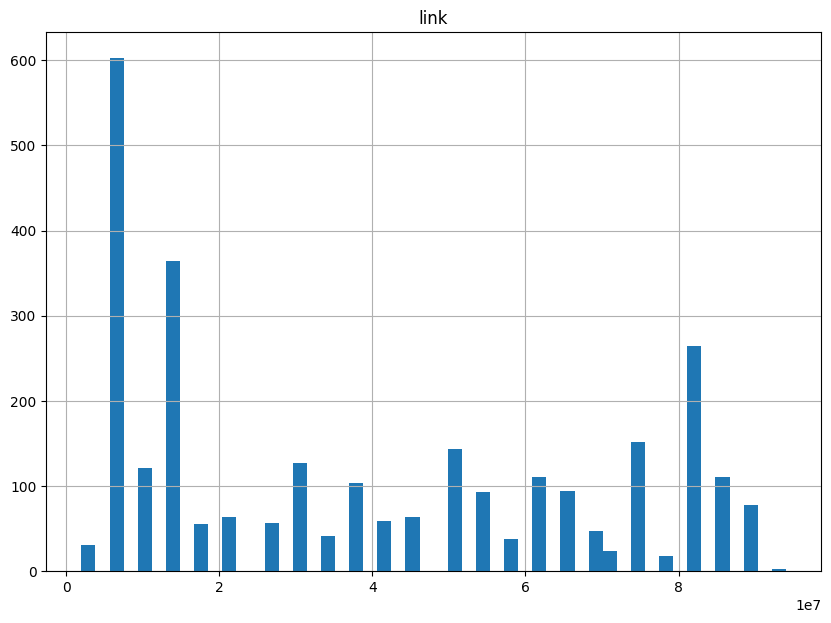

In [161]:
df3.hist(bins = 50, figsize = (10,7)) 
plt.show

In [162]:
total_registros = len(df3)
wireless_count = df3['WIRELESS'].count()
wireless_count

In [164]:
#Guardamos la cantidad de registros
total_registros = len(df3)

# Calculamos la cantidad de registros con cada tipo de conectividad
cablemodem_count = df3['CABLEMODEM'].count()
dialup_count = df3['DIALUP'].count()
wireless_count = df3['WIRELESS'].count()
telefoniafija_count = df3['TELEFONIAFIJA'].count()

# Calculamos el porcentaje de presencia de cada tipo de conectividad
cablemodem_percentage = (cablemodem_count / total_registros) * 100
dialup_percentage = (dialup_count / total_registros) * 100
wireless_percentage = (wireless_count / total_registros) * 100
telefoniafija_percentage = (telefoniafija_count / total_registros) * 100

# Imprimimos los resultados
print("Porcentaje de presencia de cada tipo de conectividad:")
print("CABLEMODEM: ", cablemodem_percentage)
print("DIALUP: ", dialup_percentage)
print("WIRELESS: ", wireless_percentage)
print("TELEFONIAFIJA: ", telefoniafija_percentage)


Porcentaje de presencia de cada tipo de conectividad:
CABLEMODEM:  66.37291280148423
DIALUP:  66.83673469387756
WIRELESS:  66.41929499072357
TELEFONIAFIJA:  66.62801484230056


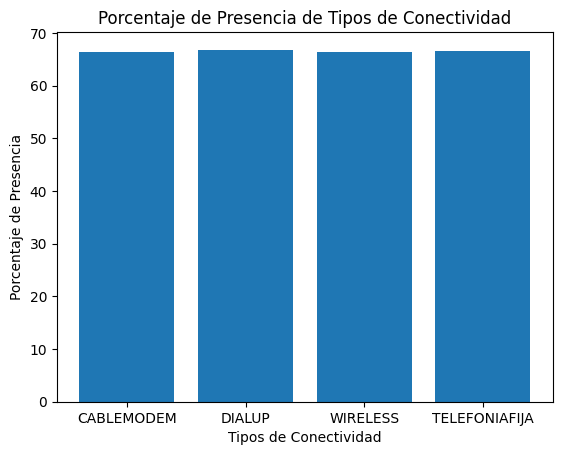

In [167]:
# GRAFICAMOS
# Tipos de conectividad
tipos_conectividad = ['CABLEMODEM', 'DIALUP', 'WIRELESS', 'TELEFONIAFIJA']

# Lista de porcentajes de presencia
porcentajes = [cablemodem_percentage, dialup_percentage, wireless_percentage, telefoniafija_percentage]

# Creamos el grafico
plt.bar(tipos_conectividad, porcentajes)


plt.xlabel('Tipos de Conectividad')
plt.ylabel('Porcentaje de Presencia')
plt.title('Porcentaje de Presencia de Tipos de Conectividad')

plt.show()


DIALUP tiene mas presencia 

In [177]:
df4= pd.read_csv("./Datos/AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171688497258403.csv")
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    643 non-null    object 
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   284 non-null    object 
 11  1 mbps      931 non-null    object 
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    16 non-null     object 
 14  2 mbps      741 non-null    object 
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      1388 non-null   object 
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    373 non-null   

In [180]:
df4.tail(10)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
3088,TUCUMAN,Tafí del Valle,Tafí del Valle,90098040,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3089,TUCUMAN,Tafí Viejo,Barrio Lomas de Tafí,90105020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3090,TUCUMAN,Tafí Viejo,Barrio Mutual San Martín,90105030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3091,TUCUMAN,Tafí Viejo,Diagonal Norte - Luz y Fuerza - Los Pocitos - ...,90105060,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219
3092,TUCUMAN,Tafí Viejo,Tafí Viejo,90105080,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,163"
3093,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304
3094,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3095,TUCUMAN,Trancas,Villa de Trancas,90112030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3096,TUCUMAN,Yerba Buena,Villa Carmela,90119020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3097,TUCUMAN,Yerba Buena,Yerba Buena - Marcos Paz,90119030,176,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,556"


In [181]:
df5= pd.read_csv("./Datos/AccesosaInternetfijoporvelocidadbajadayprovincia_2791741688497784350.csv")
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         480 non-null    float64
 1   Trimestre   480 non-null    float64
 2   Provincia   480 non-null    object 
 3   Otros       480 non-null    object 
 4   0,256 Mbps  480 non-null    object 
 5   0,375 Mbps  480 non-null    object 
 6   0,625 Mbps  480 non-null    object 
 7   0,5 Mbps    480 non-null    object 
 8   0,512 Mbps  480 non-null    object 
 9   0,75 Mbps   480 non-null    object 
 10  1 Mbps      480 non-null    object 
 11  1,2 Mbps    480 non-null    object 
 12  1,25 Mbps   480 non-null    object 
 13  1,5 Mbps    480 non-null    object 
 14  2 Mbps      480 non-null    object 
 15  2,2 Mbps    480 non-null    object 
 16  2,5 Mbps    481 non-null    object 
 17  6,7 Mbps    480 non-null    object 
 18  3 Mbps      480 non-null    object 
 19  3,2 Mbps    480 non-null    o

In [182]:
df4.head(3)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
df6= pd.read_csv("./Datos/AccesosaInternetfijoportecnologiaylocalidad_2791751688497266180.csv")
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [187]:
df6.head(4)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN


In [188]:
#ACCESO A INTERNET POR TECNOLOGIA
df7= pd.read_csv("./Datos/Internet_Accesos-por-tecnologia (1).csv")
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [189]:
df7.head(2)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679


In [191]:
df8= pd.read_csv("./Datos/Internet_Accesos-por-tecnologia.csv")
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [192]:
df8.head(2)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022


In [195]:
df9=pd.read_csv("./Datos/Internet_Accesos-por-velocidad (1).csv")
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


In [196]:
df9.head(2)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679


In [197]:
df10=pd.read_csv("./Datos/Internet_Accesos-por-velocidad.csv")
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   35 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  35 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  35 non-null     object 
 8   Más de 30 Mbps           35 non-null     object 
 9   OTROS                    35 non-null     float64
 10  Total                    35 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.4+ KB


In [198]:
df10.head(2)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128,NaN
1,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684,NaN


In [199]:
df11=pd.read_csv("./Datos/Internet_BAF (1).csv")
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


In [200]:
df11.head(2)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679


In [201]:
df12=pd.read_csv("./Datos/Internet_BAF.csv")
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [202]:
df12.head(2)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022


In [203]:
df13=pd.read_csv("./Datos/Internet_Ingresos.csv")
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [204]:
df13.head(2)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022


In [205]:
df14= pd.read_csv("./Datos/Internet_Penetracion (1).csv")
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [206]:
df14.head(2)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022


In [207]:
df15= pd.read_csv("./Datos/Internet_Penetracion.csv")
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [208]:
df15.head(2)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"


In [209]:
df16= pd.read_csv("./Datos/Listadodelocalidadesconconectividadainternet_2750221688497274562.csv")
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2876 non-null   object
 1   Partido        2880 non-null   object
 2   Localidad      2866 non-null   object
 3   ADSL           2868 non-null   object
 4   Unnamed: 4     2876 non-null   object
 5   DIALUP         2888 non-null   object
 6   FIBRAOPTICA    2868 non-null   object
 7   4G             2862 non-null   object
 8   Unnamed: 8     2881 non-null   object
 9   TELEFONIAFIJA  2885 non-null   object
 10  Unnamed: 10    2868 non-null   object
 11  SATELITAL      2878 non-null   object
dtypes: object(12)
memory usage: 404.4+ KB


In [211]:
df16.head(20)

,Unnamed: 0,Partido,Localidad,ADSL,Unnamed: 4,DIALUP,FIBRAOPTICA,4G,Unnamed: 8,TELEFONIAFIJA,Unnamed: 10,SATELITAL
0,NaN,Bahía Blanca,Villa Bordeau,NaN,NaN,--,--,NaN,NaN,--,NaN,--
1,BUENOS AIRES,NaN,Villa Espora,--,--,NaN,--,--,--,NaN,--,NaN
2,BUENOS AIRES,NaN,NaN,SI,SI,NaN,NaN,SI,SI,NaN,SI,NaN
3,BUENOS AIRES,Balcarce,NaN,--,--,--,NaN,--,--,SI,SI,--
4,BUENOS AIRES,NaN,Napaleofú,--,--,NaN,SI,SI,SI,NaN,NaN,--
5,BUENOS AIRES,Balcarce,Ramos Otero,NaN,--,--,--,NaN,--,--,SI,NaN
6,NaN,Balcarce,San Agustín,NaN,NaN,--,--,NaN,NaN,SI,SI,NaN
7,BUENOS AIRES,NaN,NaN,--,--,NaN,NaN,SI,SI,NaN,NaN,--
8,BUENOS AIRES,Baradero,NaN,SI,SI,--,NaN,SI,SI,SI,SI,SI
9,BUENOS AIRES,NaN,Irineo Portela,--,--,NaN,SI,--,--,NaN,NaN,SI
